# Tarea Programada 4

**Profesora**: María Auxiliadora Mora

**Estudiante**: Marco Ferraro

Profesora: María Auxiliadora Mora

Estudiante: Marco Ferraro Rodríguez

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual

---

Resumen: En el presente trabajo se realizarán ejercicios para repasar algunos conceptos sobre clustering

---


## 1. Datos

Para este proyecto se va a usar datos relacionados a Costa Rica. Para la tarea vamos a usar datos relacionados a los aeropuertos del país. 

Los datos utilizados se pueden encontrar en el siguiente enlace: https://data.world/ourairports/f715d50b-b28f-4644-abc9-0004e0f894c9

### 1.1 Carga de datos

En esta sección se cargaran los datos a un data frame utilizando pandas.

In [1]:
import pandas as pd

df = pd.read_csv('./data/data.csv')
df = df.drop(df.index[0])


df.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
1,4810,MROC,medium_airport,Juan Santamaria International Airport,9.993860244750977,-84.20880126953125,3021,NaN,CR,CR-A,San Jose,1,MROC,SJO,NaN,NaN,http://en.wikipedia.org/wiki/Juan_Santamar%C3%...,NaN,1050,2008-08-10T07:52:45+00:00
2,4806,MRLB,large_airport,Daniel Oduber Quiros International Airport,10.5933,-85.544403,270,NaN,CR,CR-G,Liberia,1,MRLB,LIR,NaN,NaN,http://en.wikipedia.org/wiki/Daniel_Oduber_Qui...,NaN,875,2018-07-12T02:50:33+00:00
3,4813,MRPV,medium_airport,Tobias Bolanos International Airport,9.957050323486328,-84.13980102539062,3287,NaN,CR,CR-SJ,San Jose,1,MRPV,SYQ,NaN,NaN,http://en.wikipedia.org/wiki/Tob%C3%ADas_Bola%...,NaN,875,2008-09-27T10:20:14+00:00
4,4814,MRQP,medium_airport,Quepos Managua Airport,9.443160057067871,-84.12979888916016,85,NaN,CR,CR-P,Quepos,1,MRQP,XQP,NaN,NaN,http://en.wikipedia.org/wiki/Quepos_Managua_Ai...,NaN,800,2008-06-13T14:30:04+00:00
5,4796,MRBA,medium_airport,Buenos Aires Airport,9.163949,-83.330171,1214,NaN,CR,CR-P,Punta Arenas,0,MRBA,BAI,NaN,NaN,https://en.wikipedia.org/wiki/Buenos_Aires_Air...,NaN,250,2016-06-06T07:31:45+00:00


In [2]:
labels = df['type']

labels.unique()

array(['medium_airport', 'large_airport', 'small_airport', 'closed',
       'heliport'], dtype=object)

In [3]:
labels.head()

1    medium_airport
2     large_airport
3    medium_airport
4    medium_airport
5    medium_airport
Name: type, dtype: object

### 1.2 Preprocesamiento

Este dataset maneja muchas columnas. Para un algoritmo de clustering es mejor reducir la dimensionalidad del dataset. Por lo tanto se van a eliminar varias columnas.

In [4]:
columns_to_drop = [
                      "id", "ident", "type", "name", "continent", "iso_country", "iso_region", "scheduled_service", "gps_code", "iata_code", "local_code", "home_link", "wikipedia_link", "keywords", "last_updated"
                  ]

df = df.drop(columns=columns_to_drop)

df.head()

,latitude_deg,longitude_deg,elevation_ft,municipality,score
1,9.993860244750977,-84.20880126953125,3021,San Jose,1050
2,10.5933,-85.544403,270,Liberia,875
3,9.957050323486328,-84.13980102539062,3287,San Jose,875
4,9.443160057067871,-84.12979888916016,85,Quepos,800
5,9.163949,-83.330171,1214,Punta Arenas,250


Se decidió solo utilizar las columnas `latitude_deg`, `longitude_deg`, `elevation_ft`, `municipality` y `score`. Se decidieron estas columnas ya que son las que, intuitivamente nos ayudan a agrupar las caracteristicas de un aeropuerto.

`municipality` es una variable categorica, por lo que hay que representarlo de forma númerica. A continuación se hara un mappeo de todas la municipalidades en el dataset y se le asignará un valor único a cada municipalidad.

In [5]:
locations = df['municipality'].unique()

locations

array(['San Jose', 'Liberia', 'Quepos', 'Punta Arenas', 'Nicoya',
       'Puerto Limon', 'Pococi', 'Roxana', 'La Fortuna/San Carlos',
       'Nicoya/Guanacate', 'Puntarenas', 'Tamarindo', 'Corredores',
       'Golfito', 'Palmar Sur', 'Puerto Jimenez', 'Nandayure',
       'Coto Brus', 'Los Chiles', 'Upala', 'Abangares', 'Alajuela',
       'Amubri', 'Bagaces', 'Brasilito', 'Cañas', 'Carrillo', 'Carrizal',
       'Chorotega', 'Filadelfia', 'Florencia', 'Garza', 'Guacimo',
       'Guanacaste', 'Guapiles', 'Jaco', 'La Cruz', 'Las Trancas',
       'Limón', 'Miramar', 'Orotina', 'Paquera', 'Parrita', 'Paso Canoas',
       'Pérez Zeledón', 'Portalón', 'Puerto Cortés',
       'Rio Frio / Progreso', 'Ron Ron', 'Salama', 'San Carlos',
       'San Pedro', 'Santa Cruz', 'Sarapiqui', 'Siquirres', 'Sixaola',
       'Talamanca', 'Ticabán', 'Turrialba', 'Zapotal', nan,
       'AltaGracia Resort', 'Area metropolitana', 'Escazu',
       'Marina Resort', 'Península de Osa', 'Potrero Grande',
       'San I

In [6]:
mapping = {location: index for index, location in enumerate(locations)}

# Replace the values in the 'municipality' column with their indices
df['municipality'] = df['municipality'].replace(mapping)



df.head()

,latitude_deg,longitude_deg,elevation_ft,municipality,score
1,9.993860244750977,-84.20880126953125,3021,0,1050
2,10.5933,-85.544403,270,1,875
3,9.957050323486328,-84.13980102539062,3287,0,875
4,9.443160057067871,-84.12979888916016,85,2,800
5,9.163949,-83.330171,1214,3,250


Otro aspecto importante es que vamos a eliminar las filas que tengan valores faltantes. Asimismo vamos a pasar el df actual como nuestra X. Recordemos que los labels los habiamos extraidos previamente.

In [7]:
df = df.dropna()
df

,latitude_deg,longitude_deg,elevation_ft,municipality,score
1,9.993860244750977,-84.20880126953125,3021,0,1050
2,10.5933,-85.544403,270,1,875
3,9.957050323486328,-84.13980102539062,3287,0,875
4,9.443160057067871,-84.12979888916016,85,2,800
5,9.163949,-83.330171,1214,3,250
...,...,...,...,...,...
128,9.933333396911621,-84.16666412353516,3296,68,0
129,10.316699981689453,-83.91670227050781,889,53,0
130,10.569,-83.5149,19,69,0
131,9.363861,-83.626046,2822,70,0


In [8]:
X = df.to_numpy()
X

array([['9.993860244750977', '-84.20880126953125', '3021', 0, '1050'],
       ['10.5933', '-85.544403', '270', 1, '875'],
       ['9.957050323486328', '-84.13980102539062', '3287', 0, '875'],
       ['9.443160057067871', '-84.12979888916016', '85', 2, '800'],
       ['9.163949', '-83.330171', '1214', 3, '250'],
       ['9.73852', '-85.013802', '33', 4, '50'],
       ['9.95796012878418', '-83.02200317382812', '7', 5, '875'],
       ['10.768699645996094', '-83.58560180664062', '3', 6, '800'],
       ['10.42', '-83.6095', '92', 7, '800'],
       ['10.2172002792', '-83.79699707030001', '883', 6, '250'],
       ['10.478', '-84.634499', '342', 8, '50'],
       ['10.649999618530273', '-85.53299713134766', '177', 1, '50'],
       ['10.139399528503418', '-85.44580078125', '365', 9, '50'],
       ['9.98141002655', '-84.7726974487', '7', 10, '50'],
       ['8.71889019012', '-83.6417007446', '12', 10, '50'],
       ['9.391960144042969', '-84.12590026855469', '15', 2, '50'],
       ['10.31350040435

## 2. Clustering

El clustering es una técnica de análisis de datos que agrupa objetos similares en conjuntos llamados "clusters" o grupos, con el objetivo de encontrar patrones o estructuras ocultas en los datos. Se utiliza en diversas aplicaciones, como segmentación de clientes, análisis de redes sociales, clasificación de documentos y más. Los algoritmos de clustering asignan elementos a grupos en función de similitudes entre ellos, como distancia euclidiana o medidas de similitud. Algunos métodos populares son k-means, jerárquico y DBSCAN.

### 2.1 DBSCAN 

DBSCAN es un algoritmo de agrupamiento que encuentra grupos en datos basados en la cercanía entre puntos. Encuentra grupos de diferentes formas y tamaños, y también puede identificar puntos ruidosos. No requiere predefinir el número de grupos y es útil para datos con densidades variables.

Se utilizará scikit learn.

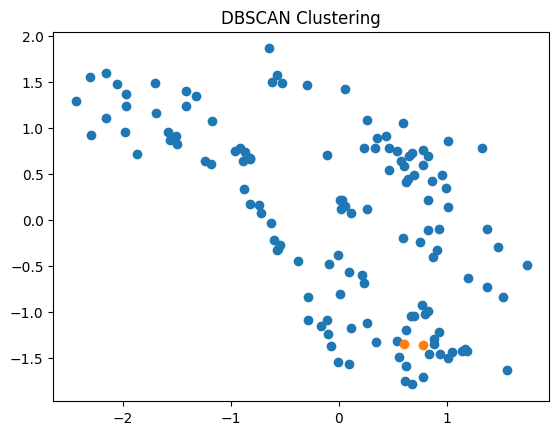

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=2)
yhat = dbscan.fit_predict(X)
clusters = np.unique(yhat)

# Plot the clusters
for cluster in clusters:
    row_ix = np.where(yhat == cluster)[0]
    plt.scatter(X_scaled[row_ix, 0], X_scaled[row_ix, 1])

plt.title('DBSCAN Clustering')
plt.show()


Podemos notar que con 2 min_samples DBSCAN logra acentuar dos clusters.

### 2.2 K-Means 

K-means es un algoritmo de agrupamiento que divide datos en grupos basados en similitudes. Funciona asignando puntos a grupos centrados alrededor de "centroides". Iterativamente, ajusta los centroides para minimizar las distancias internas y maximizar las distancias entre grupos. Requiere especificar previamente el número de grupos (k) y es eficaz para datos con estructuras claras y bien definidas.

Scikit learn nos ofrece un modelo.

c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


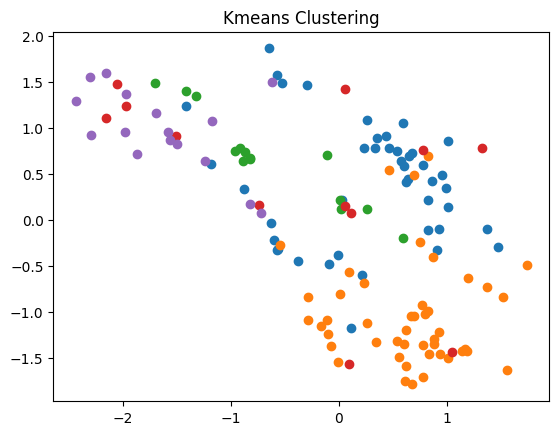

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=5, random_state=0)
yhat = kmeans.fit_predict(X_scaled)
clusters = np.unique(yhat)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)[0]
    plt.scatter(X_scaled[row_ix, 0], X_scaled[row_ix, 1])

plt.title('Kmeans Clustering')
plt.show()


Arbitrariamente definimos 5 clusters y obtenemos este gráfico. Notese que, aunque hay 5 clusters, no estan definidos con claridad.

### 2.3 Birch

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) es un algoritmo de agrupamiento jerárquico diseñado para manejar grandes conjuntos de datos de manera eficiente. Utiliza una estructura de árbol para reducir los datos gradualmente mientras construye una jerarquía de clusters. Esto permite un procesamiento más rápido y es útil cuando se enfrenta a grandes cantidades de datos. BIRCH se centra en la eficiencia y es adecuado para datos que pueden ser representados en forma de "resumen" en lugar de puntos individuales.

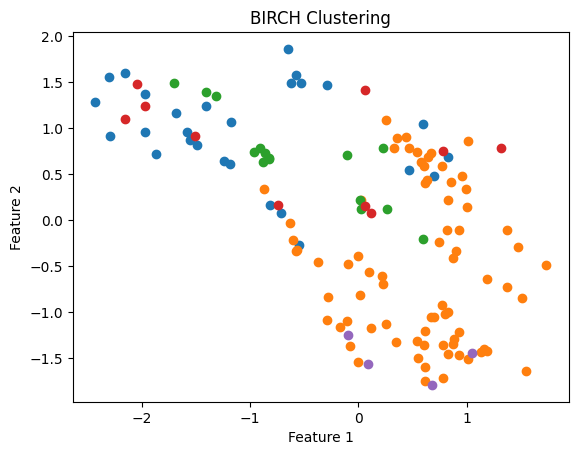

In [11]:
from sklearn.cluster import Birch

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply BIRCH clustering
birch = Birch(n_clusters=5)
yhat = birch.fit_predict(X_scaled)
clusters = np.unique(yhat)

# Plot the BIRCH clusters
for cluster in clusters:
    row_indices = np.where(yhat == cluster)[0]
    plt.scatter(X_scaled[row_indices, 0], X_scaled[row_indices, 1])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('BIRCH Clustering')
plt.show()



## 3. Hipertunning

Para esta sección haremos refinamiento o hipertunning de parametros para todos los modelos anteriores. Adicionalmente volveremos a medir el rendimiento de estos modelos con los parametros respectivos.



### 3.1 K Means con Elbow Method.

El método del codo con K-means ayuda a elegir el número óptimo de grupos al trazar la relación entre la cantidad de grupos y la variación en los datos. Se busca el punto en el gráfico donde la disminución de variación se desacelera significativamente, lo que indica el número adecuado de grupos.

c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

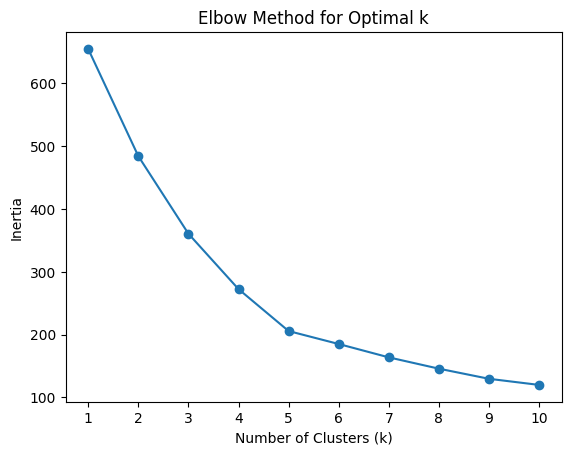

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.show()

En la gráfico podemos vere como, al aumentar el número de clusters la inercia tiende a bajar.

### 3.2 K means con método de silueta

El método de la silueta con K-means evalúa cuán bien los puntos están agrupados midiendo su cercanía dentro de un clúster y su distancia a otros clústeres. Ayuda a elegir el número correcto de clústeres al mostrar cuándo la agrupación es sólida y separada.

Utilizaremos un arreglo para almacenar los valores de silueta y poder graficarlos.

c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

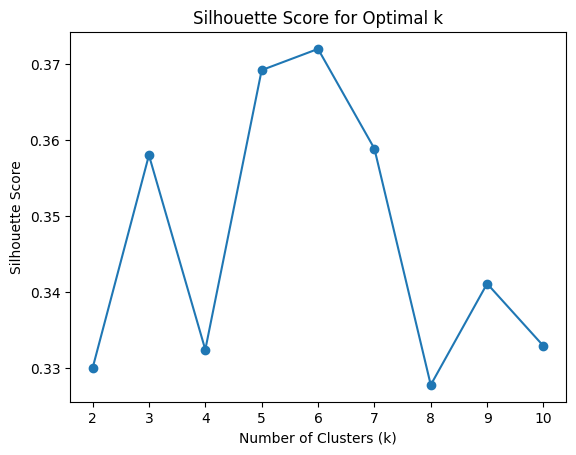

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


silhouette_scores = []
for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(range(2, 11))
plt.show()


Como se puede ver en el gráfico, al usar el método de silueta como métrica de evaluación vemos que el número óptimo de clusters es 6. Por lo tanto, el resultado del Silhouette Score es el siguiente

In [14]:
print("Silhouette Score of the Final Model:", silhouette_scores[5])

Silhouette Score of the Final Model: 0.35887361127428363


Para el resto de modelos vamos a definir una función reutilizable.

In [15]:
from sklearn.metrics import silhouette_score

def custom_scoring(estimator, X):
    labels = estimator.predict(X)
    score = silhouette_score(X, labels)
    return score

### 3.3 BIRCH con Silueta

El método de la silueta con el algoritmo BIRCH evalúa la calidad de las agrupaciones al medir la separación de los puntos en los clústeres. Es importante usar validación cruzada aleatoria (random CV) en BIRCH debido a su naturaleza sensible a la inicialización de los centroides, a diferencia de K-means.

En BIRCH, la elección inicial de los centroides puede afectar significativamente el resultado de la agrupación. Emplear validación cruzada aleatoria ayuda a mitigar el impacto de una inicialización inadecuada, mejorando la robustez y estabilidad de los resultados de BIRCH. Por otro lado, en K-means, la aleatoriedad en la inicialización es menos problemática debido a que la optimización tiende a converger hacia una solución aceptable.

Scikit learn nos permide usar Randomized Search para el tunning de hiperparámetros.

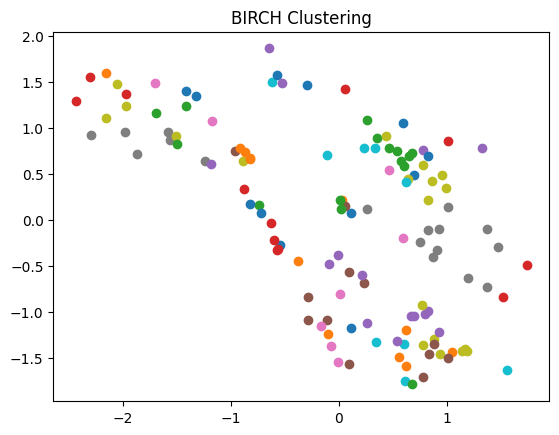

Best Hyperparameters: {'threshold': 0.4, 'branching_factor': 25}
Silhouette Score of the Final Model: 0.3481184103904369


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

param_dist = {
    'branching_factor': np.arange(10, 31),
    'threshold': np.arange(0.1, 0.4, 0.1)
}

birch = Birch(n_clusters=None)
random_search = RandomizedSearchCV(birch, param_distributions=param_dist, scoring=custom_scoring, cv=3, n_iter=5)
random_search.fit(X_scaled)

best_birch = random_search.best_estimator_

yhat = best_birch.fit_predict(X_scaled)
clusters = np.unique(yhat)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X_scaled[row_ix, 0], X_scaled[row_ix, 1])

plt.title('BIRCH Clustering')
plt.show()

print("Best Hyperparameters:", random_search.best_params_)
silhouette_avg = silhouette_score(X_scaled, yhat)
print("Silhouette Score of the Final Model:", silhouette_avg)


Vemos como el gráfico difiere a la iteración anterior, sin embargo no estan claros los clusters.

### 3.4 DBSCAN con Silueta

El método de la silueta también se aplica al algoritmo DBSCAN para evaluar cómo los puntos están distribuidos en los clústeres. A diferencia de BIRCH, no es tan necesario recurrir a la validación cruzada aleatoria en DBSCAN debido a su enfoque particular. Sin embargo vamos a usarlo para mantener las pruebas esntandarizadas.


Para el random search se elige una distribución de epsilon de 0.1 a 1.1, y del hiperparametro `min_samples` de 1 a 11. Esto debido al rendimiento del modelo.

c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Marco\AppData\Local\Temp\ipykernel_18724\2944539377.py", line 10, in custom_scoring
    score = silhouette_score(X, labels)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 211, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_unsupervised.py",

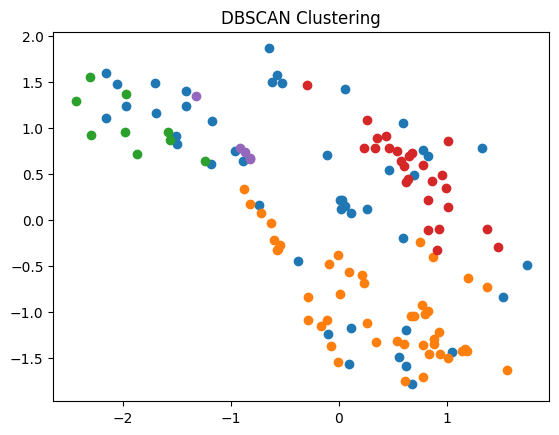

Best Hyperparameters: {'min_samples': 5, 'eps': 0.8}
Silhouette Score of the Final Model: 0.18154210635887047


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import silhouette_score

def custom_scoring(estimator, X):
    labels = estimator.fit_predict(X)
    score = silhouette_score(X, labels)
    return score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

param_dist = {
    'eps': np.arange(0.1, 1.1, 0.1),
    'min_samples': np.arange(1, 11)
}

dbscan = DBSCAN()

random_search = RandomizedSearchCV(dbscan, param_distributions=param_dist, scoring=custom_scoring, cv=3, n_iter=5)
random_search.fit(X_scaled)
best_dbscan = random_search.best_estimator_
yhat = best_dbscan.fit_predict(X_scaled)



clusters = np.unique(yhat)

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X_scaled[row_ix, 0], X_scaled[row_ix, 1])

plt.title('DBSCAN Clustering')
plt.show()

print("Best Hyperparameters:", random_search.best_params_)
silhouette_avg = silhouette_score(X_scaled, yhat)
print("Silhouette Score of the Final Model:", silhouette_avg)


### 4. Conclusiones

* K-Means y Segmentación Compacta: El alto valor del coeficiente de silueta (0.358) para K-Means sugiere que este modelo ha logrado formar clusters más compactos y bien separados en comparación con los otros algoritmos. La naturaleza iterativa de K-Means y su objetivo de minimizar la varianza intra-cluster pueden haber permitido encontrar grupos más definidos en el conjunto de datos, lo que lo convierte en una elección eficaz cuando la distribución de los datos es más uniforme y los grupos son de forma esférica o similar.

* BIRCH y Densidad en Conjuntos Grandes: Aunque el coeficiente de silueta para BIRCH (0.328) es ligeramente menor que el de K-Means, sigue siendo significativo. BIRCH es eficiente en términos de uso de memoria y es especialmente útil cuando se trata de conjuntos de datos grandes, ya que utiliza estructuras de árbol para agrupar los datos en función de la densidad. Esto sugiere que en el contexto de aeropuertos de Costa Rica, BIRCH podría haber identificado clusters con densidades variables, lo que puede ser beneficioso para detectar aeropuertos con distintos niveles de tráfico y conectividad.

* DBSCAN y Detección de Anomalías: El bajo coeficiente de silueta para DBSCAN (0.031) indica que este algoritmo puede no ser tan adecuado para el conjunto de datos de aeropuertos de Costa Rica en su forma actual. DBSCAN se destaca en la detección de clusters con formas y densidades irregulares, así como en la identificación de puntos anómalos. La baja eficiencia de DBSCAN en este caso podría sugerir que la mayoría de los aeropuertos tienen características relativamente homogéneas en términos de proximidad y densidad, lo que dificulta la identificación de clusters significativos mediante este enfoque.

* Consideraciones Contextuales: La eficiencia relativa de los modelos también puede depender de factores contextuales y de negocio. Es importante considerar la naturaleza de los datos y los objetivos del análisis. Por ejemplo, si la planificación de rutas aéreas o la identificación de hubs son prioridades, entonces BIRCH y K-Means podrían ser más útiles. Si se busca detectar aeropuertos con características inusuales o anómalas, DBSCAN podría ser más relevante.

### Referencias

Ahmed, M., Seraj, R., & Islam, S. M. S. (2020). The k-means algorithm: A comprehensive survey and performance evaluation. Electronics, 9(8), 1295.

Zhang, T., Ramakrishnan, R., & Livny, M. (1996). BIRCH: an efficient data clustering method for very large databases. ACM sigmod record, 25(2), 103-114.

Birant, D., & Kut, A. (2007). ST-DBSCAN: An algorithm for clustering spatial–temporal data. Data & knowledge engineering, 60(1), 208-221.

Barlow, H. B. (1989). Unsupervised learning. Neural computation, 1(3), 295-311.